In [41]:
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import classify
from nltk.tokenize import TweetTokenizer
from nltk import NaiveBayesClassifier
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

#import regex
import re

#import BeautifulSoup
from bs4 import BeautifulSoup

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import text 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import text
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import BernoulliNB

# Word2vec
#import gensim

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

# etc
import string
import pandas as pd
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools
from wordcloud import WordCloud


#gensim
#from gensim.test.utils import common_texts
#from gensim.models import Word2Vec

#keras
#from keras.preprocessing.text import Tokenizer, text_to_word_sequence
#from keras.preprocessing.sequence import pad_sequences
#from keras.models import Sequential
#from keras.layers import Embedding
#from keras.layers import Dense, Dropout, Input, Activation
#from keras.layers.recurrent import LSTM
#from keras.callbacks import ReduceLROnPlateau
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.models import Model
#from keras.optimizers import RMSprop

In [42]:
Columns  = ["sentiment", "user_id", "date", "query", "username", "text"]
Date = "ISO-8859-1"

In [43]:
tweets = pd.read_csv("Data/tweets_new.csv", encoding = Date, names = Columns, error_bad_lines = False, skiprows=[323043])


In [16]:
#Filter by sentiment and text
#tweets =tweets[['sentiment', 'text', 'username']]
#sentiment_mapping = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
#def map_sentiment(input):
#    return sentiment_mapping[int(input)]
#tweets['sentiment'] = tweets['sentiment'].apply(lambda x: map_sentiment(x))


In [44]:
tweets_df = tweets[['sentiment', 'text']]


In [45]:
#Map target value(y) to sentiment strings
sentiment_mapping = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def map_sentiment_map(input):
    return sentiment_mapping[int(input)]

In [46]:
#apply sentiment mapping to all of the dataset
y_samp = tweets_df['sentiment'].apply(lambda x: map_sentiment_map(x))


In [47]:
#data cleaning
punct = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct))


In [48]:
tweets['text'] = tweets_df['text'].apply(lambda text: remove_punctuation(text))

In [49]:
stemmer = PorterStemmer()
more_stop_words =  ('go', 'twitter', 'Twitter', 'TWITTER', 'Tweet', 'got', 'quot', 'amp', 'nan', 'you', 'time', 'im', 'ur', 'ill', 'just', 'a', 'and', 'dont', 'don\'t', 'twitter', 'tweet')
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

def clean(text):
    #removed links and chars
    remove = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(remove, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split(): 
        if token not in stop_words:
                tokens.append(stemmer.stem(token))
    return " ".join(tokens)

#remove not from stop word

In [50]:
tweets_clean = tweets.text.apply(lambda x: clean(x))

In [51]:
def cleaned(token):
    if token == 'sorri':
        return 'sorry'
    if token == 'r':
        return 'are'
    if token == 'realli':
        return 'really'
    if token == 'happi':
        return 'happy'
  
    return token

In [52]:
tweets_cleaned = tweets_clean.apply(lambda x: cleaned(x))

In [26]:
from collections import Counter
cnt = Counter()
for text in tweets_cleaned.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('day', 97911),
 ('good', 88644),
 ('work', 80774),
 ('like', 80340),
 ('love', 79767),
 ('today', 63454),
 ('go', 61828),
 ('thank', 57390),
 ('want', 54485),
 ('lol', 54137)]

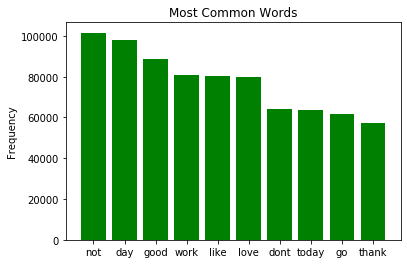

In [44]:
y = [count for tag, count in cnt.most_common(10)]
x = [tag for tag, count in cnt.most_common(10)]

plt.bar(x, y, color='green')

plt.title("Most Common Words")
plt.ylabel("Frequency")
plt.savefig('Top_10_Words')


In [53]:
plt.figure(figsize=(12,7))
common_keyword=sns.barplot(x=tweets[tweets['sentiment']=='POSITIVE']['username'].value_counts()[:10].index, \
                           y=tweets[tweets['sentiment']=='POSITIVE']['username'].value_counts()[:10],palette='viridis')
common_keyword.set_xticklabels(common_keyword.get_xticklabels(),rotation=90)
common_keyword.set_ylabel('Frequency',fontsize=12)
plt.title('Top 10 Usernames With Positive Tweets',fontsize=16)

plt.show()
plt.savefig('Top_10_Usernames')


/usr/local/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: min() arg is an empty sequence

<Figure size 864x504 with 0 Axes>

In [75]:
pd.set_option('display.max_colwidth',-1)
tweets[tweets['username']=='what_bugs_u'].head()


,sentiment,text,username
1141441,POSITIVE,"@JadeMcCray why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1141626,POSITIVE,"@cadmiumcannibal why limit your story to 140 ch. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1141648,POSITIVE,"@RonanDosSantos why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1141674,POSITIVE,"@ShayMac28 why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u
1142667,POSITIVE,"@lynnsdecor why limit your story to 140 chr. Tell all what is annoying you at www.iamsoannoyed.com ,it will help relieve your stress",what_bugs_u


In [39]:
tweets_concat = pd.concat([tweets_cleaned, y_samp], axis=1)

In [ ]:
samp = tweets_concat.sample(n=500000,replace=False)

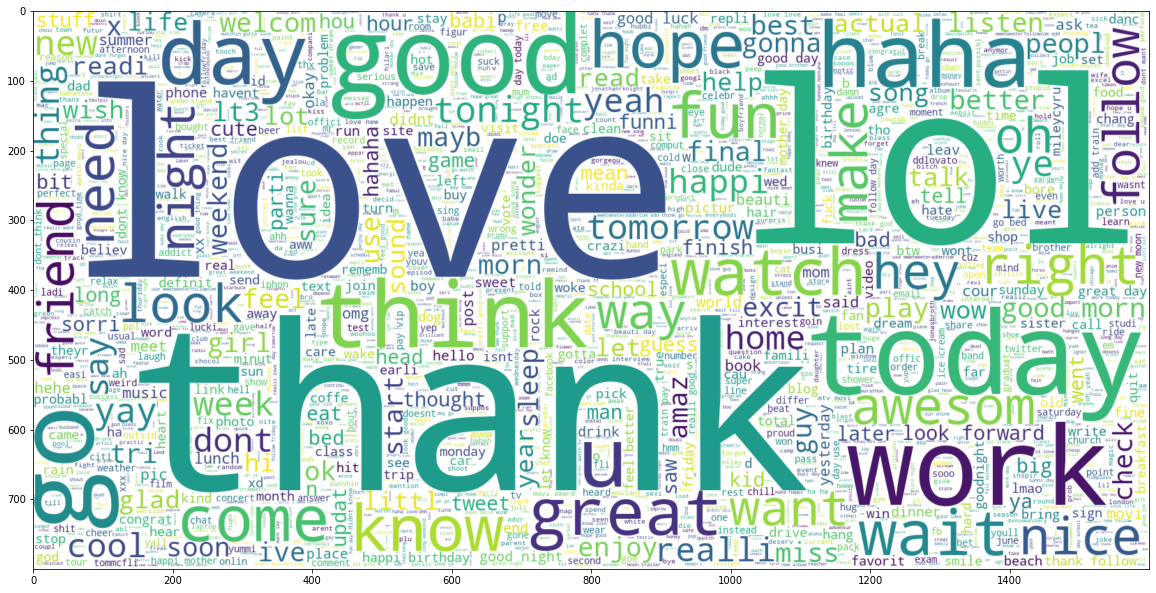

In [56]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color="white").generate(" ".join(samp[samp['sentiment'] == 'POSITIVE'].text))
plt.savefig('Images/Positive_Word_Cloud')
plt.imshow(wc , interpolation = 'bilinear')


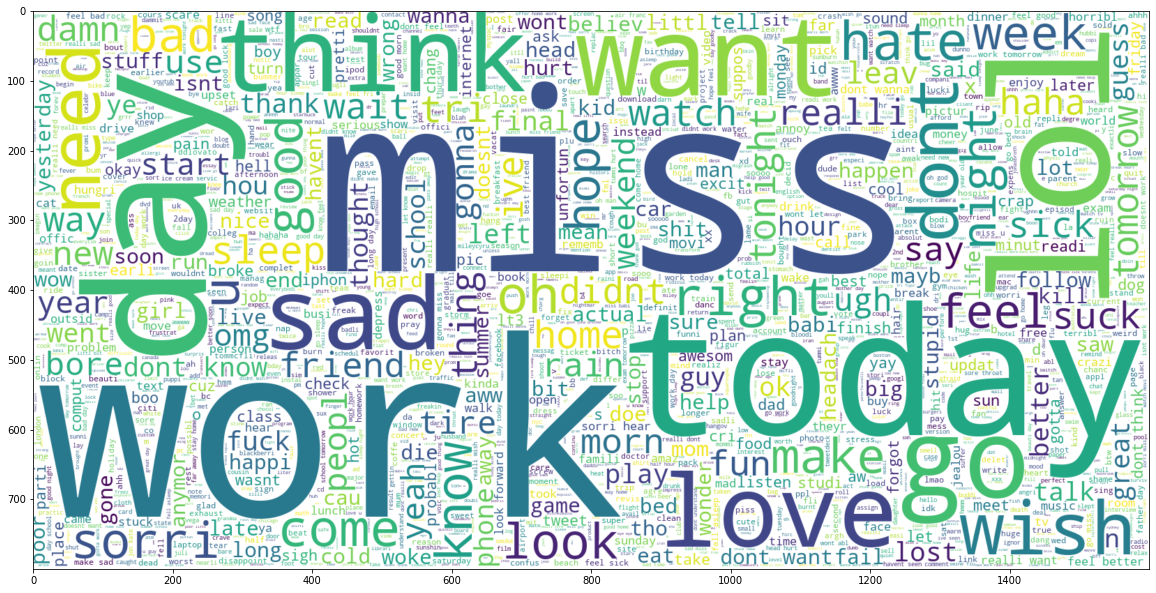

In [57]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color="white").generate(" ".join(samp[samp['sentiment'] == 'NEGATIVE'].text))
plt.savefig('Images/Negative_Word_Cloud')

plt.imshow(wc , interpolation = 'bilinear')


In [40]:
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.85, min_df=1, max_features=5000, ngram_range=(1,3))
X = vectorizer.fit_transform(tweets_concat['text'])

TypeError: 'module' object is not iterable

In [103]:
features = vectorizer.get_feature_names()

In [43]:
len(features)

5000

In [21]:
lda = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='online', n_jobs=-1)
lda.fit(X)
top_components = lda.components_.argsort()[:,-1:-11:-1]

for i, v in enumerate(top_components):
    print(i, [features[i] for i in v])

0 ['fun', 'look', 'tonight', 'didnt', 'bad', 'rain', 'awesom', 'ok', 'ugh', 'kid']
1 ['today', 'come', 'watch', 'wait', 'sleep', 'play', 'movi', 'use', 'leav', 'day']
2 ['like', 'home', 'wish', 'hour', 'look', 'make', 'littl', 'hurt', 'parti', 'good']
3 ['want', 'know', 'follow', 'feel', 'friend', 'hate', 'did', 'long', 'oh', 'let']
4 ['night', 'haha', 'say', 'tri', 'tomorrow', 'went', 'stuff', 'good', 'big', 'excit']
5 ['love', 'morn', 'miss', 'new', 'nice', 'sorri', 'tweet', 'wanna', 'good', 'lol']
6 ['wont', 'yay', 'phone', 'wow', 'run', 'favorit', 'plan', 'sweet', 'goodnight', 'studi']
7 ['work', 'day', 'school', 'final', 'year', 'help', 'hous', 'tell', 'weekend', 'readi']
8 ['need', 'week', 'great', 'twitter', 'start', 'hey', 'right', 'talk', 'live', 'man']
9 ['thank', 'day', 'good', 'realli', 'hope', 'happi', 'yeah', 'think', 'make', 'better']


In [30]:
#samp_csv = tweets_concat.to_csv('/tf/Desktop/Class/Twitter-Sentiment-Analysis/samp.csv')

In [235]:
#samp_c = pd.read_csv('/tf/Desktop/Class/Twitter-Sentiment-Analysis/App/samp.csv')

In [32]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(tweets_concat['text'])
y = tweets_concat['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)


In [34]:
multi_naive_bayes = MultinomialNB()
fitted = multi_naive_bayes.fit(X_train, y_train)
np.mean(fitted.predict(X_test) == y_test)

#75% on 100ku 

0.7626209280165382

In [38]:
y_pred = multi_naive_bayes.predict(X_testt)

In [76]:
y_pred

array(['POSITIVE', 'POSITIVE', 'POSITIVE', ..., 'NEGATIVE', 'NEGATIVE',
       'POSITIVE'], dtype='<U8')

In [77]:
def predict(text):
  
    text_ = vectorizer.transform([text])
    score = multi_naive_bayes.predict(text_)
    return score

In [32]:
a = predict('war')
print(a)

['NEGATIVE']


In [33]:
confusion_matrix(y_test, y_pred)

NameError: name 'y_test' is not defined

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.75      0.77      0.76    149558
    POSITIVE       0.78      0.76      0.77    160027

    accuracy                           0.76    309585
   macro avg       0.76      0.76      0.76    309585
weighted avg       0.76      0.76      0.76    309585



In [80]:
accuracy_score(y_test, y_pred) # TP + TN/ TP + TN + FP + FN

0.7627081415443254

In [82]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

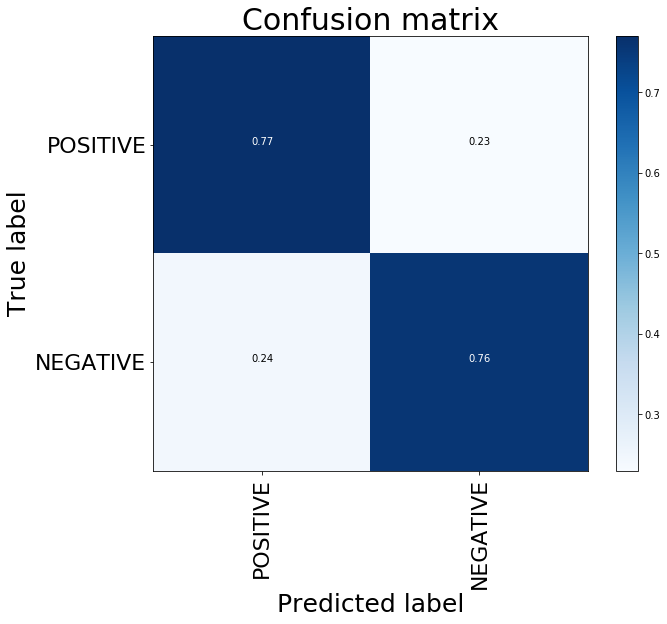

In [83]:
#based on 100k samples, .739 accuracy
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=samp['sentiment'].unique(), title="Confusion matrix")
plt.show()

In [23]:
vectorizer = CountVectorizer()
X_l = vectorizer.fit_transform(tweets_concat['text'])
y_l= tweets_concat['sentiment']

X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_l, y_l, test_size=0.20, random_state=2)


In [24]:
from sklearn.linear_model import LogisticRegression 
logisticRegr = LogisticRegression() 

In [25]:
logisticRegr.fit(X_trainl, y_trainl)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = logisticRegr, X = X_trainl, y = y_trainl, cv = 10) 
accuracies.mean()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7726171893925423

In [31]:
y_pred_l = logisticRegr.predict(X_testl)

In [36]:
confusion_matrix(y_testl, y_pred_l)

array([[110228,  39369],
       [ 31127, 128861]])

In [37]:
print(classification_report(y_testl, y_pred_l))

              precision    recall  f1-score   support

    NEGATIVE       0.78      0.74      0.76    149597
    POSITIVE       0.77      0.81      0.79    159988

   micro avg       0.77      0.77      0.77    309585
   macro avg       0.77      0.77      0.77    309585
weighted avg       0.77      0.77      0.77    309585



In [37]:
multi_naive_bayes = MultinomialNB()
fitted = multi_naive_bayes.fit(X_train, y_train)
np.mean(fitted.predict(X_test) == y_test)


0.7626209280165382